hypothesis 	actual
0: -20.0		0: 1
1: 8		1: 8
2: 36.0		2: 36
3: 64.0		3: 120
4: 92.0		4: 330
5: 120.0		5: 792
6: 148.0		6: 1716

differences: [-21.0, 0, 0.0, -56.0, -238.0, -672.0, -1568.0]


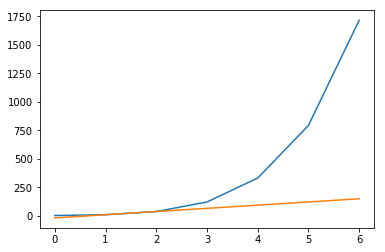

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import comb as choose, factorial
comb = lambda x,y: choose(x,y, exact=True)
fac = lambda x: factorial(x, exact=True)

deg_seven = {0: 1, 1: 8, 2: 36, 3: 120, 4: 330, 5: 792, 6: 1716}

def hyp(k, n=7): 
    if k==1: return int(8)
    else: #return (k-1)*comb(n+k,2) + k*sum([hyp(k) for k in range(k)])//2
        return ((k-1)*comb(n+1, 2) + (n+1))

attempt = {k: hyp(k, n=7) for k in range(7)}


print('hypothesis \tactual')
for key in attempt: 
    print(f'{key}: {attempt[key]}\t\t{key}: {deg_seven[key]}')

diffs = [attempt[k]-deg_seven[k] for k in attempt]

print(f'\ndifferences: {diffs}')


plt.plot(deg_seven.keys(), deg_seven.values());
plt.plot(attempt.keys(), attempt.values());

hypothesis 	actual
0: 1		0: 1
1: 8		1: 8
2: 36		2: 36
3: 120		3: 120
4: 330		4: 330
5: 792		5: 792
6: 1716		6: 1716

differences: [0, 0, 0, 0, 0, 0, 0]


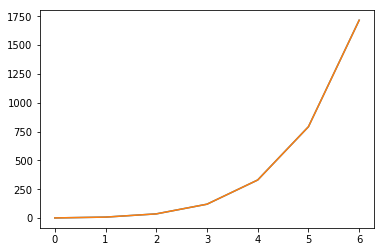

In [172]:
# this was embarrasingly easy, once it hit me. 
def hyp(k, n=9): 
    return comb(n+k, k)

def hyp2(k, n=9):
    ## A Apte was right about the recursion
    if k==0: return 1
    else: return comb(n+k-1, k) + hyp2(k-1)
    
assert all([hyp(k)==hyp2(k) for k in range(10)])    



attempt = {k: hyp(k, n=7) for k in range(7)}


print('hypothesis \tactual')
for key in attempt: 
    print(f'{key}: {attempt[key]}\t\t{key}: {deg_seven[key]}')

diffs = [attempt[k]-deg_seven[k] for k in attempt]

print(f'\ndifferences: {diffs}')


plt.plot(deg_seven.keys(), deg_seven.values());
plt.plot(attempt.keys(), attempt.values());

In [56]:
76*2

152

In [153]:
# squarepyramid 
def sqpyram(n): 
    return sum([k**2 for k in range(n+1)])

def catalan(n): 
    return int(choose(2*n, n) / (n+1))

print([sqpyram(k) for k in range(20)])
print([catalan(k) for k in range(16)])





[0, 1, 5, 14, 30, 55, 91, 140, 204, 285, 385, 506, 650, 819, 1015, 1240, 1496, 1785, 2109, 2470]
[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796, 58786, 208012, 742900, 2674440, 9694845]


In [154]:
def faulhaber(n, p): 
    if n==0: return 0
    else: return n**p + faulhaber(n-1, p)


pd.DataFrame.from_dict({p: [faulhaber(k,p) for k in range(10)] for p in range(10)}).T

,0,1,2,3,4,5,6,7,8,9
0,0,1,2,3,4,5,6,7,8,9
1,0,1,3,6,10,15,21,28,36,45
2,0,1,5,14,30,55,91,140,204,285
3,0,1,9,36,100,225,441,784,1296,2025
4,0,1,17,98,354,979,2275,4676,8772,15333
5,0,1,33,276,1300,4425,12201,29008,61776,120825
6,0,1,65,794,4890,20515,67171,184820,446964,978405
7,0,1,129,2316,18700,96825,376761,1200304,3297456,8080425
8,0,1,257,6818,72354,462979,2142595,7907396,24684612,67731333
9,0,1,513,20196,282340,2235465,12313161,52666768,186884496,574304985


In [174]:
choose(9,3)

84.0

In [175]:
n=9
k=3

comb(n+k-1, k) == comb(n+k-1, n-1)

True